In [7]:
from google.colab import files
uploaded = files.upload()



Saving kickers.csv to kickers.csv


In [8]:
import pandas as pd

# Replace 'your_file.csv' with the actual name of your CSV file
df = pd.read_csv('kickers.csv')

# Display the first few rows of the DataFrame
df.head()


,Week,Kicker Name,Team,Opponent,Home/Away,Stadium,Stadium Type,Fantasy Points
0,1,Younghoe Koo,ATL,NO,Home,Mercedes-Benz Stadium,Outdoors,18
1,1,Cade York,CLE,CAR,Home,FirstEnergy Stadium,Outdoors,16
2,1,Chris Boswell,PIT,CIN,Home,Acrisure Stadium,Outdoors,13
3,1,Greg Joseph,MIN,GB,Home,U.S. Bank Stadium,Indoors,13
4,1,Ryan Succop,TB,DAL,Home,Raymond James Stadium,Outdoors,13


In [20]:
df['Fantasy Points'] = pd.to_numeric(df['Fantasy Points'], errors='coerce')
df['Stadium Type'] = df['Stadium Type'].astype('category')
df['Home/Away'] = df['Home/Away'].astype('category')
df_filtered = df[['Stadium Type', 'Home/Away', 'Fantasy Points']]


In [21]:
# Group by Home/Away and calculate mean fantasy points
performance_by_home_away = df_filtered.groupby('Home/Away')['Fantasy Points'].mean().reset_index()
print(performance_by_home_away)


  Home/Away  Fantasy Points
0      Away        6.729730
1      Home        8.090909


<ipython-input-21-d1020dbaa44c>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  performance_by_home_away = df_filtered.groupby('Home/Away')['Fantasy Points'].mean().reset_index()


In [22]:
# Group by home away and calculate mean fantasy points
performance_by_home = df_filtered.groupby('Stadium Type')['Fantasy Points'].mean().reset_index()
print(performance_by_stadium)

  Stadium Type  Fantasy Points
0      Indoors        8.133333
1     Outdoors        7.547368


<ipython-input-22-c20b3c0618a6>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  performance_by_home = df_filtered.groupby('Stadium Type')['Fantasy Points'].mean().reset_index()


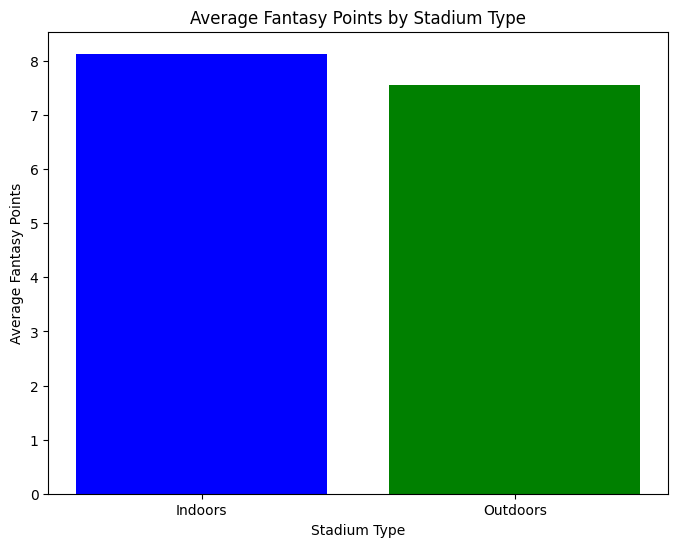

In [12]:
import matplotlib.pyplot as plt

# Bar plot to compare performance
plt.figure(figsize=(8, 6))
plt.bar(performance_by_stadium['Stadium Type'], performance_by_stadium['Fantasy Points'], color=['blue', 'green'])
plt.xlabel('Stadium Type')
plt.ylabel('Average Fantasy Points')
plt.title('Average Fantasy Points by Stadium Type')
plt.show()


<ipython-input-15-67b28b54fa95>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  performance_by_kicker_and_stadium = df.groupby(['Kicker Name', 'Stadium Type'])['Fantasy Points'].mean().reset_index()


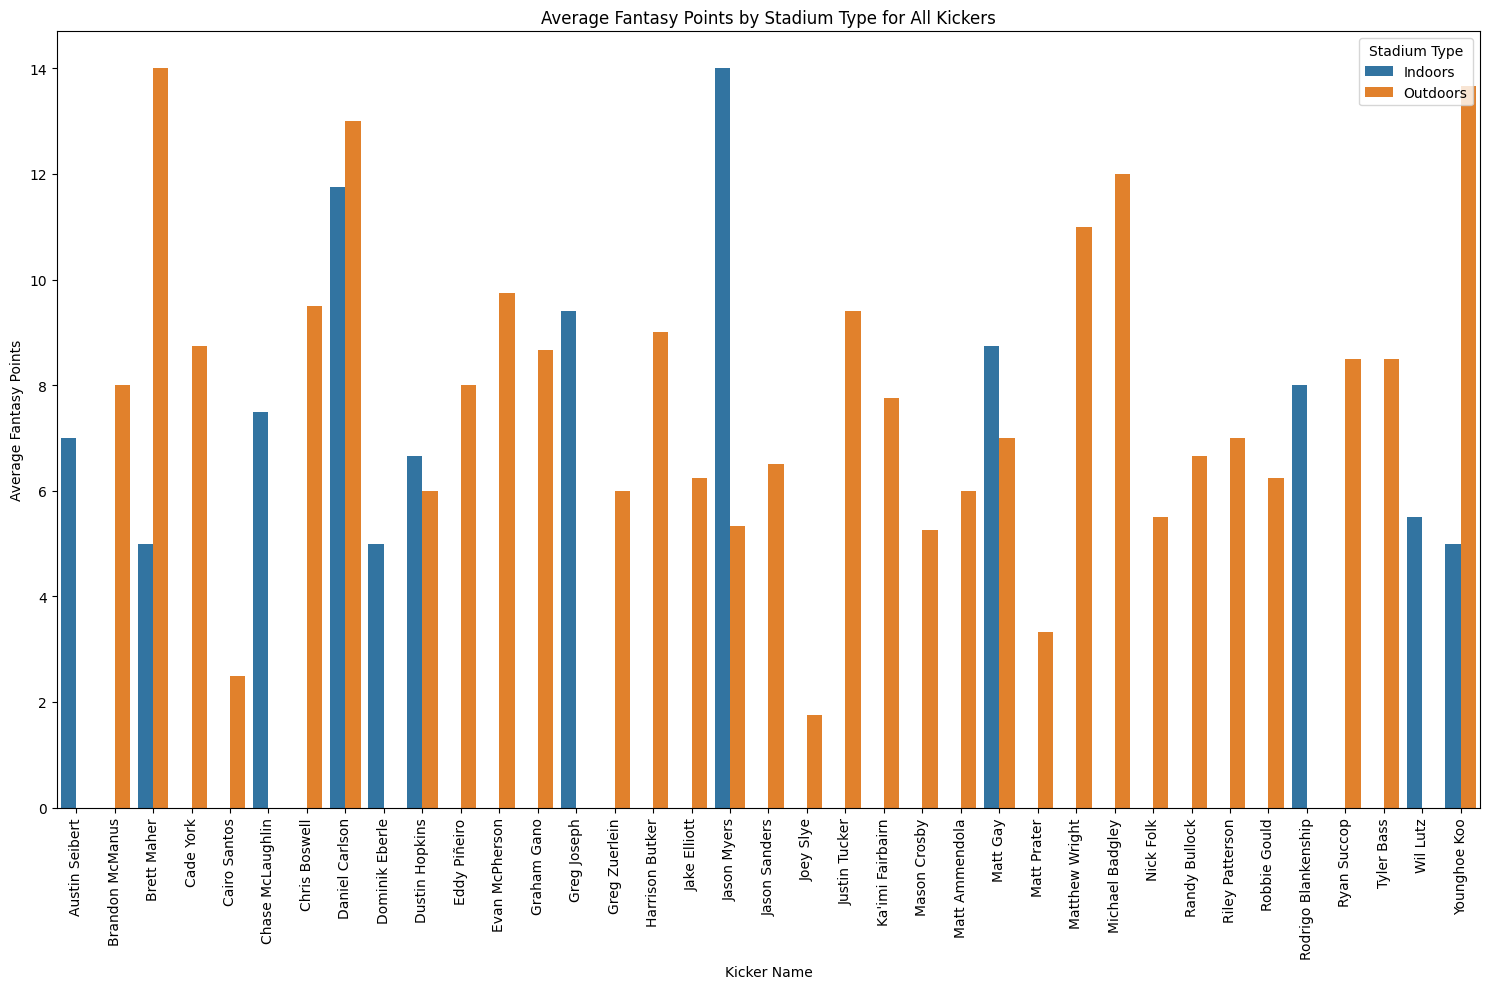

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Group by Kicker Name and Stadium Type, then calculate the mean Fantasy Points
performance_by_kicker_and_stadium = df.groupby(['Kicker Name', 'Stadium Type'])['Fantasy Points'].mean().reset_index()

# Create a bar plot for each kicker
plt.figure(figsize=(15, 10))
sns.barplot(x='Kicker Name', y='Fantasy Points', hue='Stadium Type', data=performance_by_kicker_and_stadium)
plt.xticks(rotation=90)
plt.xlabel('Kicker Name')
plt.ylabel('Average Fantasy Points')
plt.title('Average Fantasy Points by Stadium Type for All Kickers')
plt.legend(title='Stadium Type')
plt.tight_layout()
plt.show()

